# 1. Importando bibliotecas <a name="import"></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set_theme()

Crie um jupyter notebook com os imports necessários e um código para gerar os
gráficos referentes a base de dados de março, abril, maio, junho e dezembro
(numa célula só ou em várias)

### Gerando analises mensais - Scripting

Março, abril, maio, junho e dezembro

In [2]:
sns.set()  

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None


2019-03
2019-04
2019-05
2019-06
2019-12


C:\Users\sann_\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:512: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


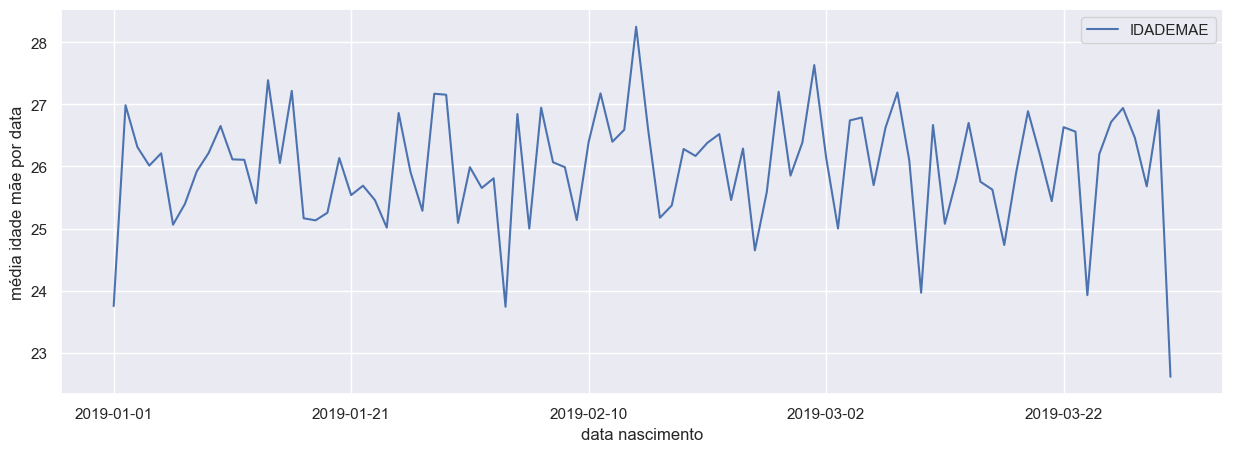

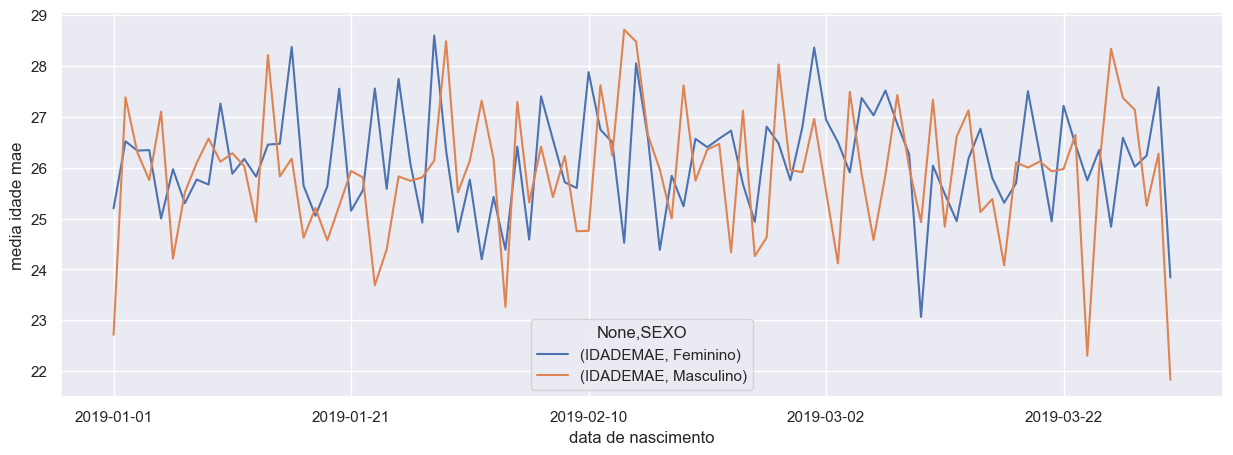

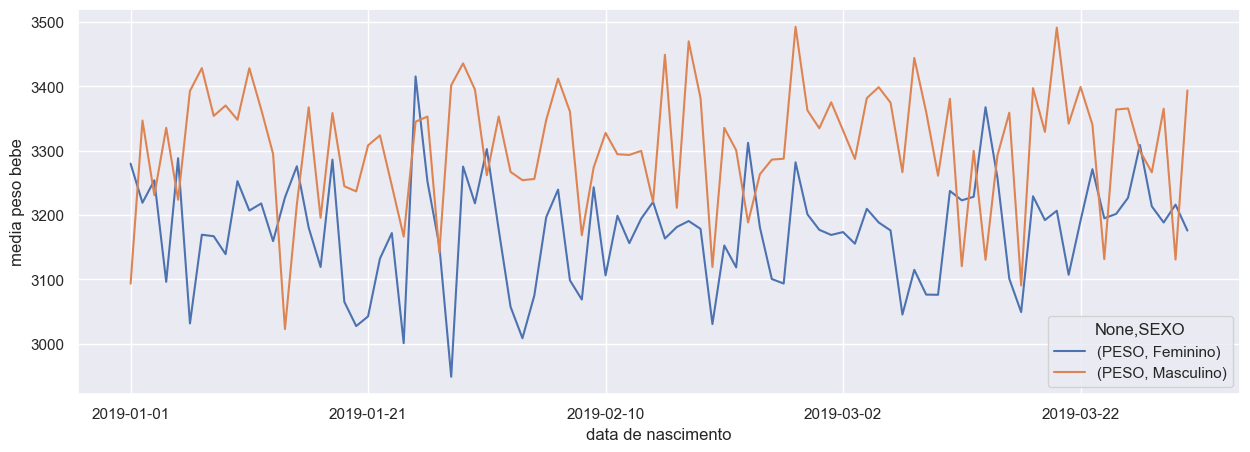

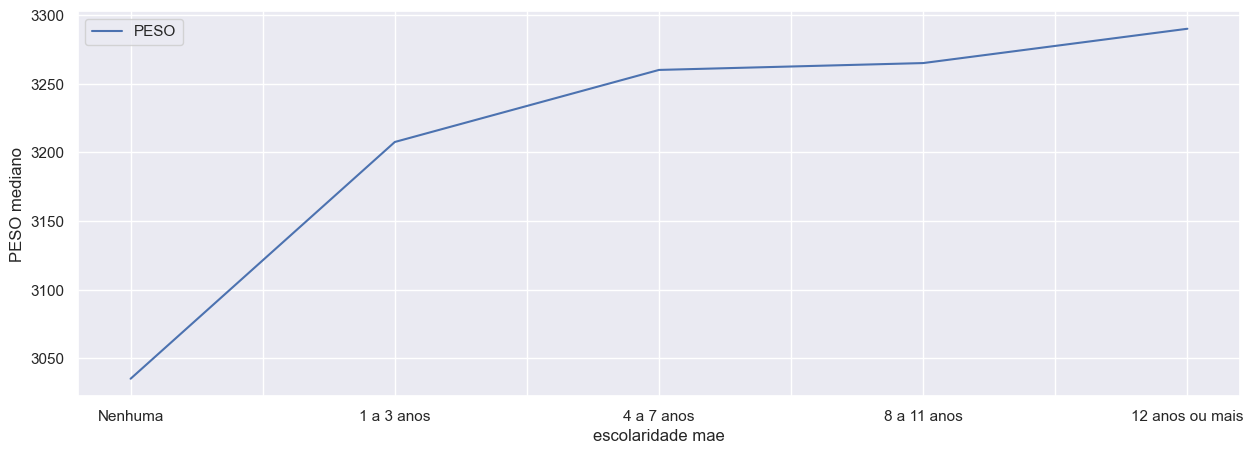

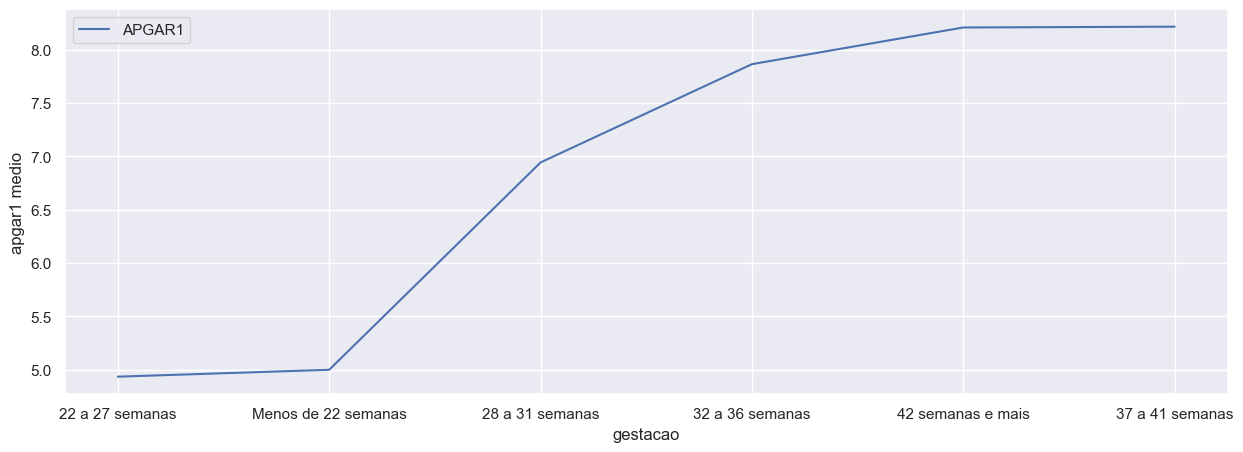

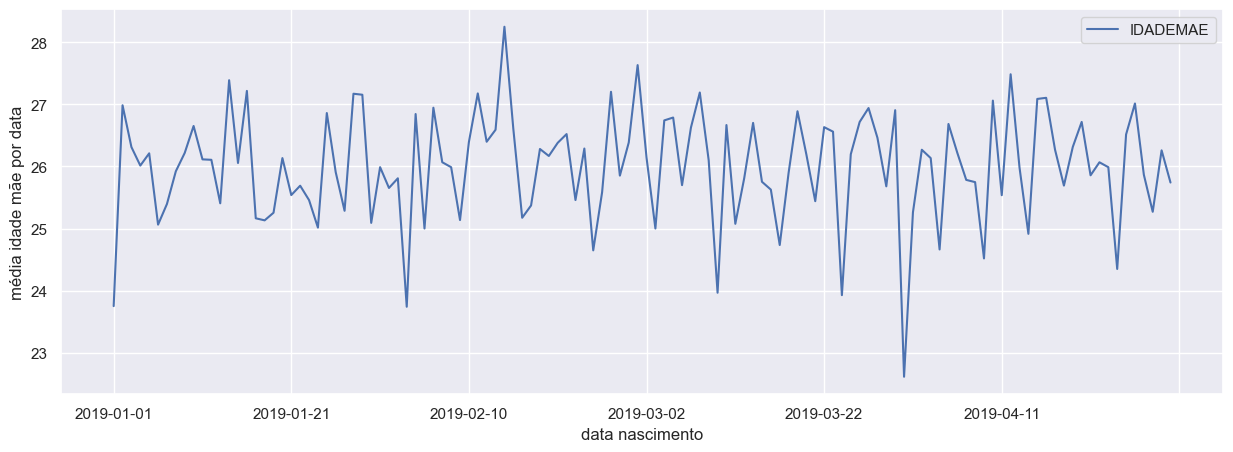

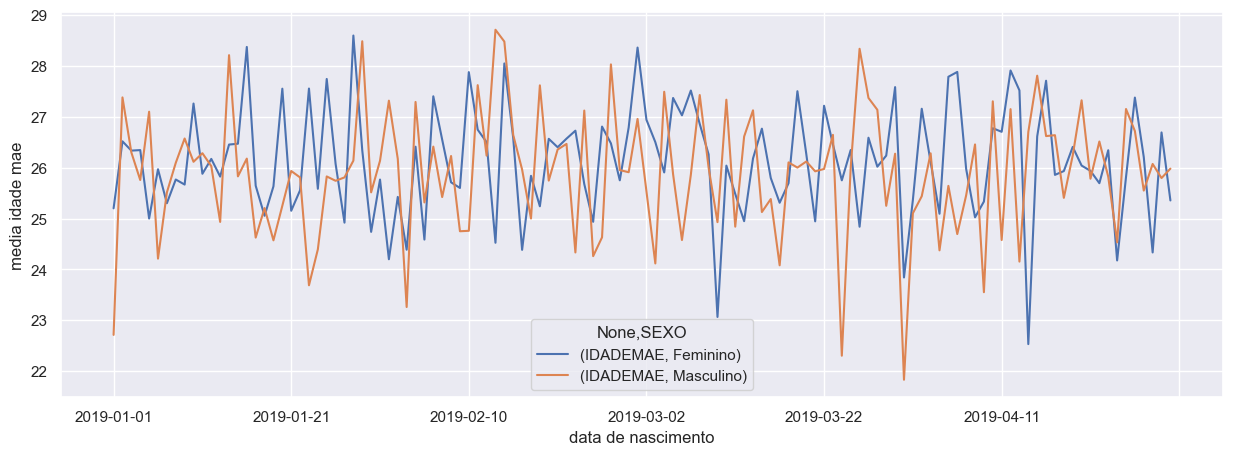

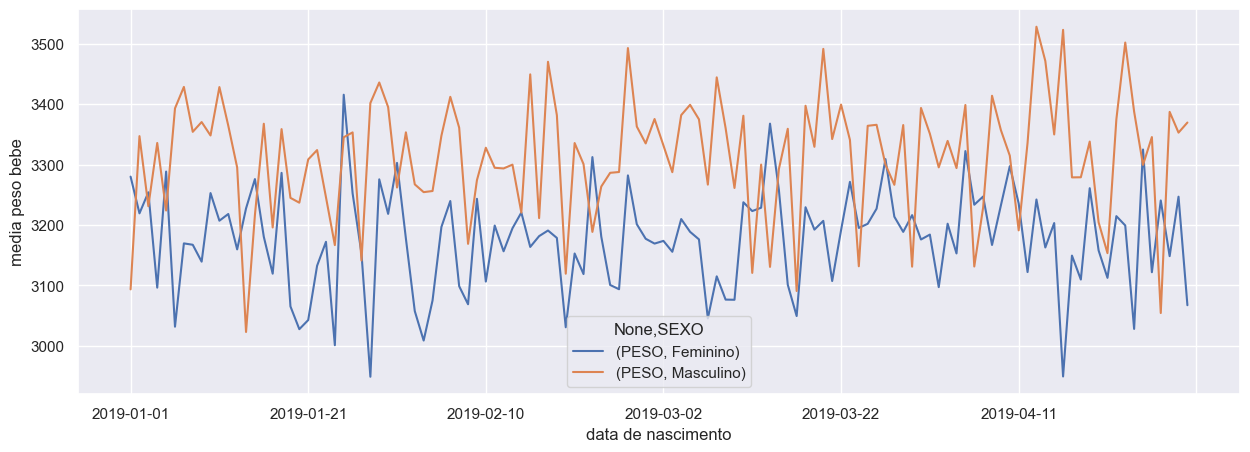

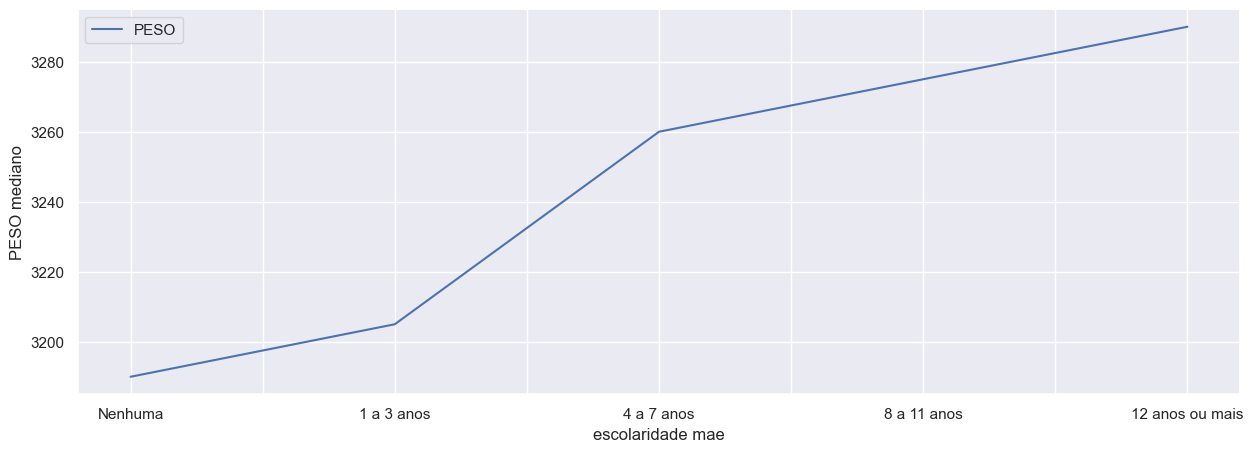

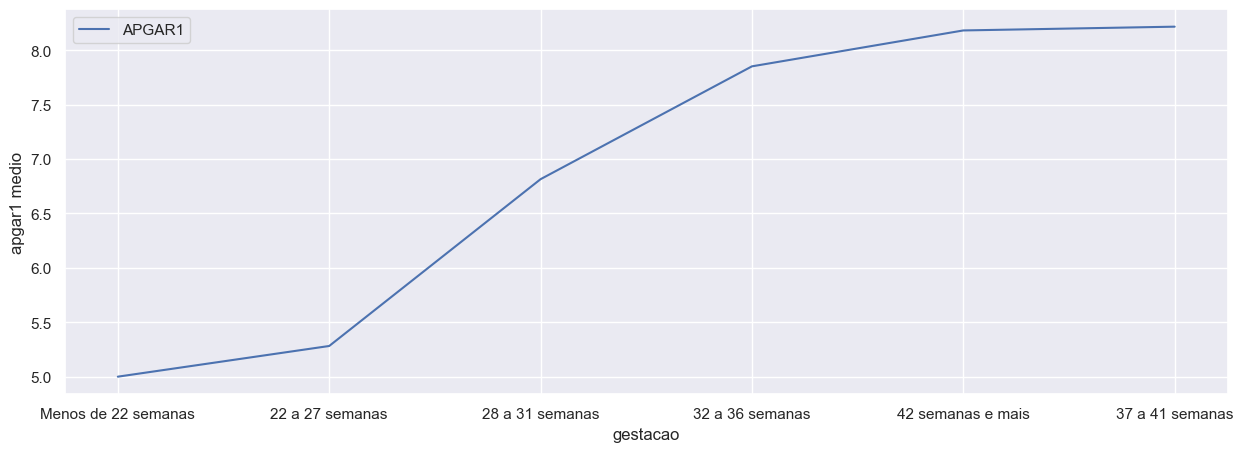

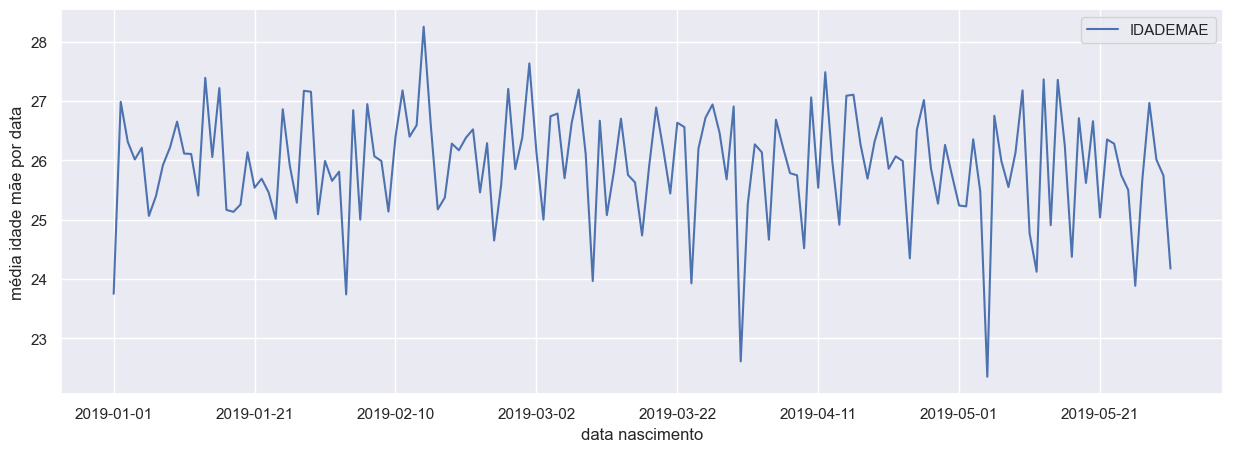

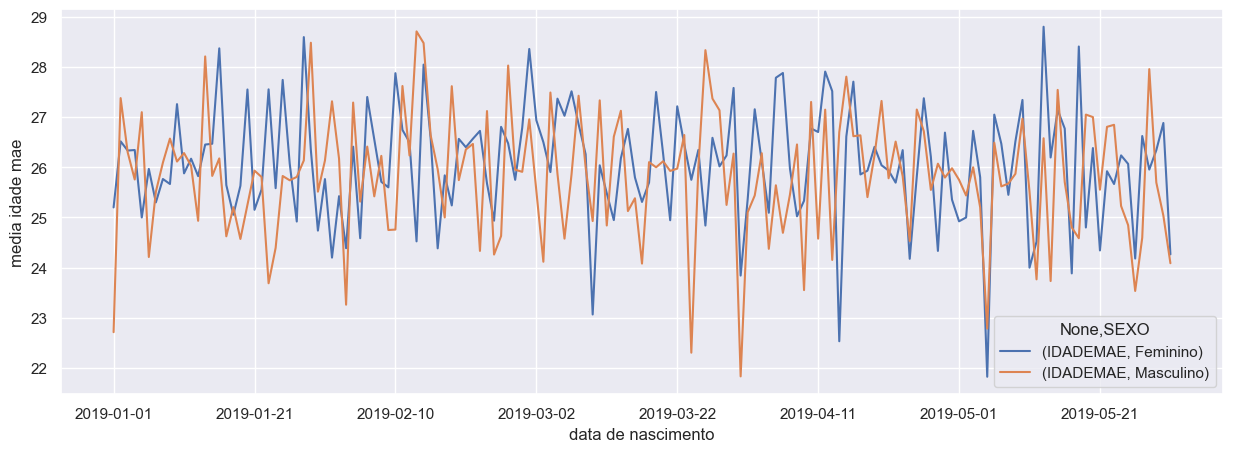

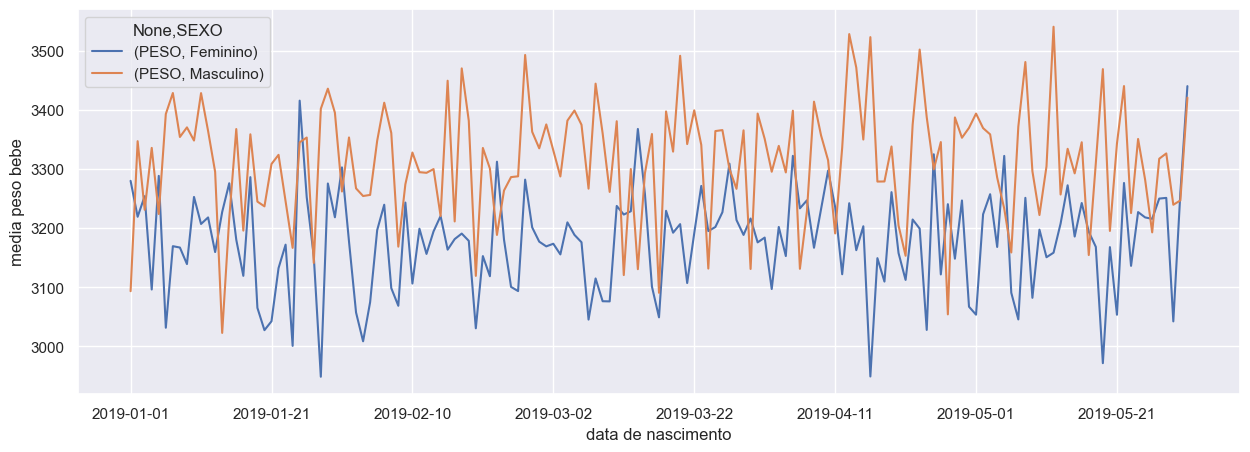

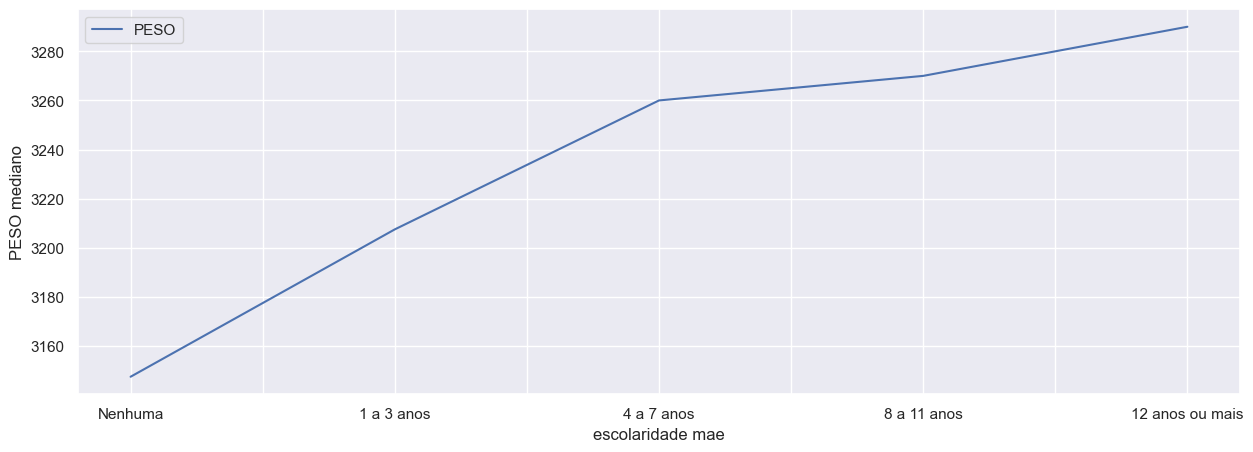

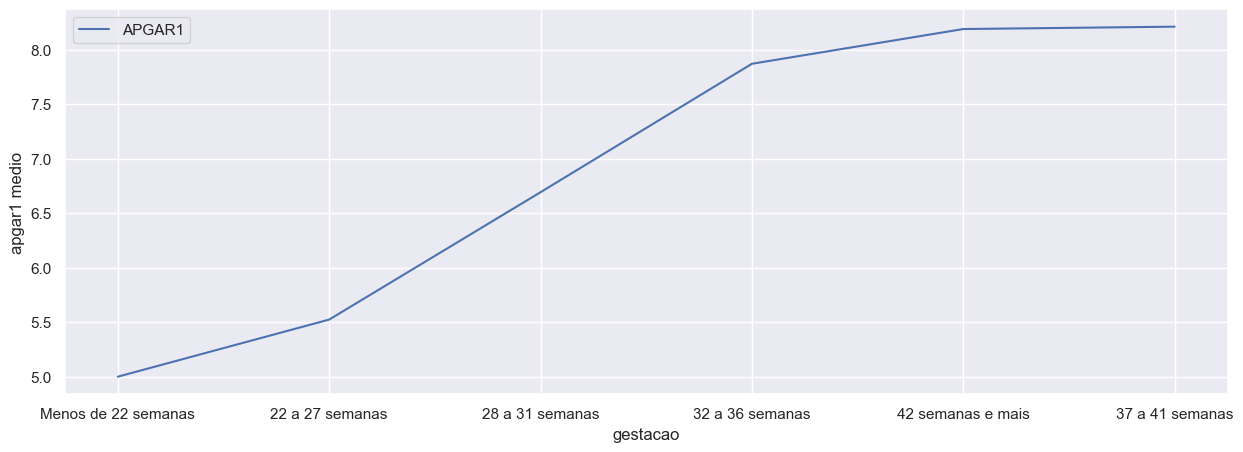

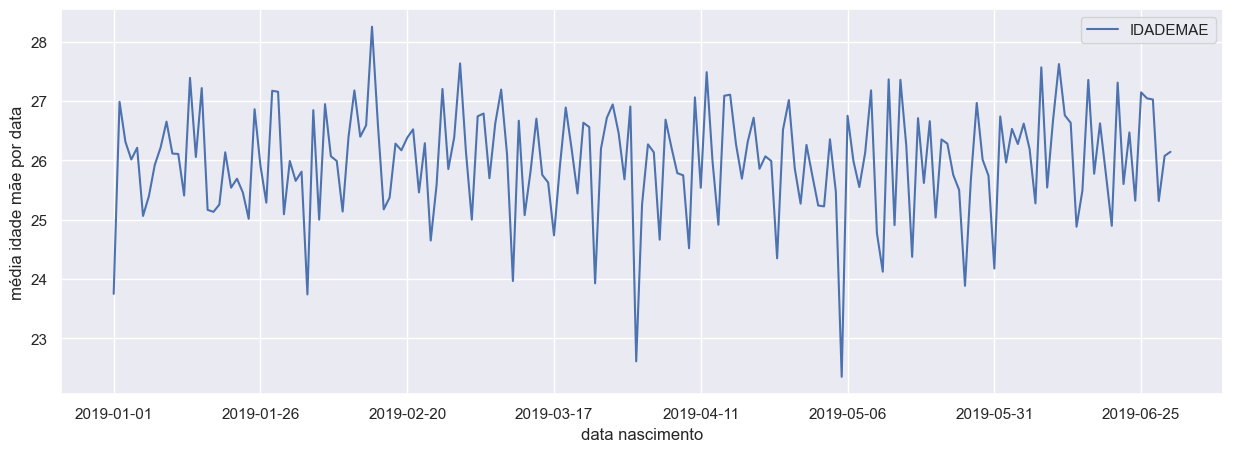

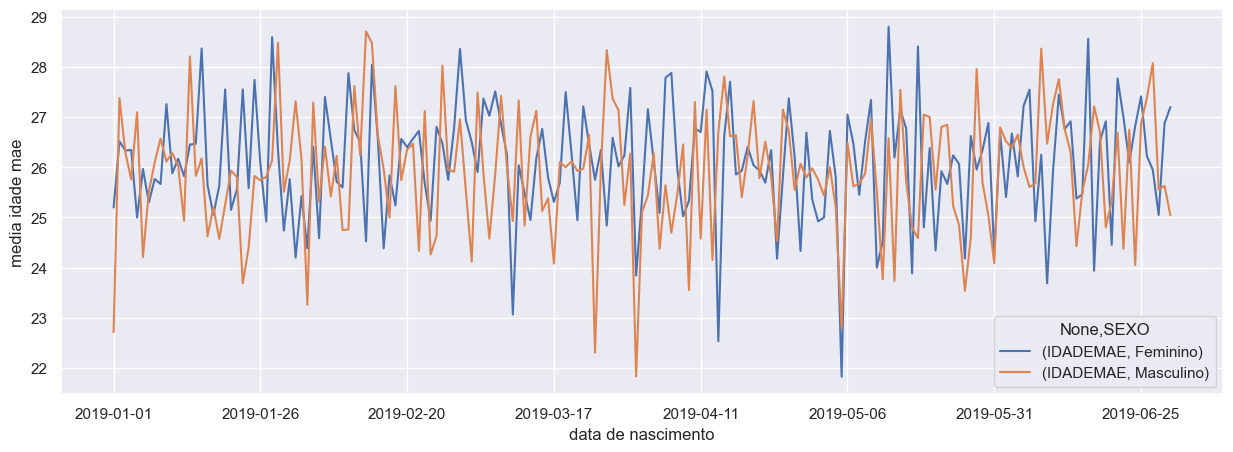

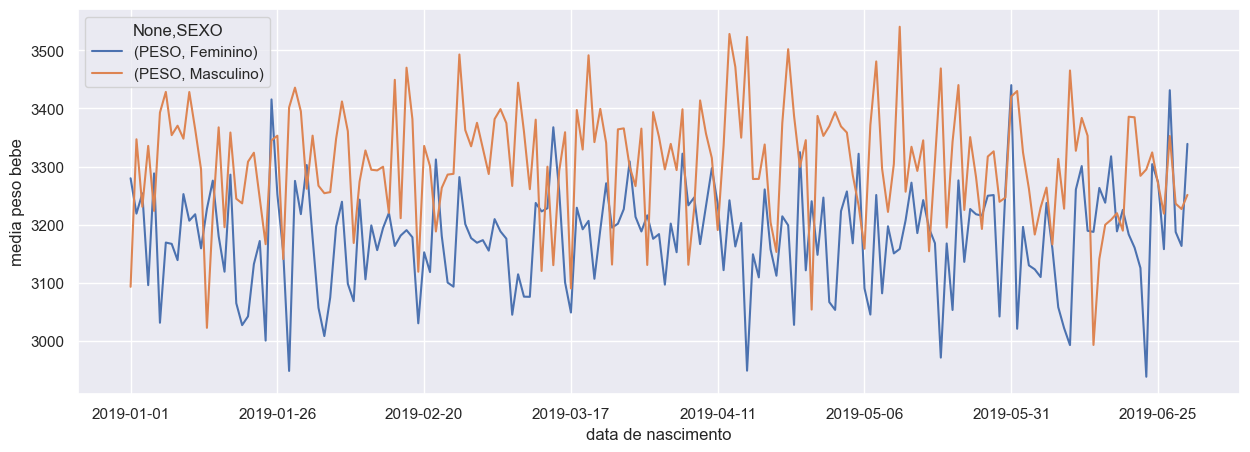

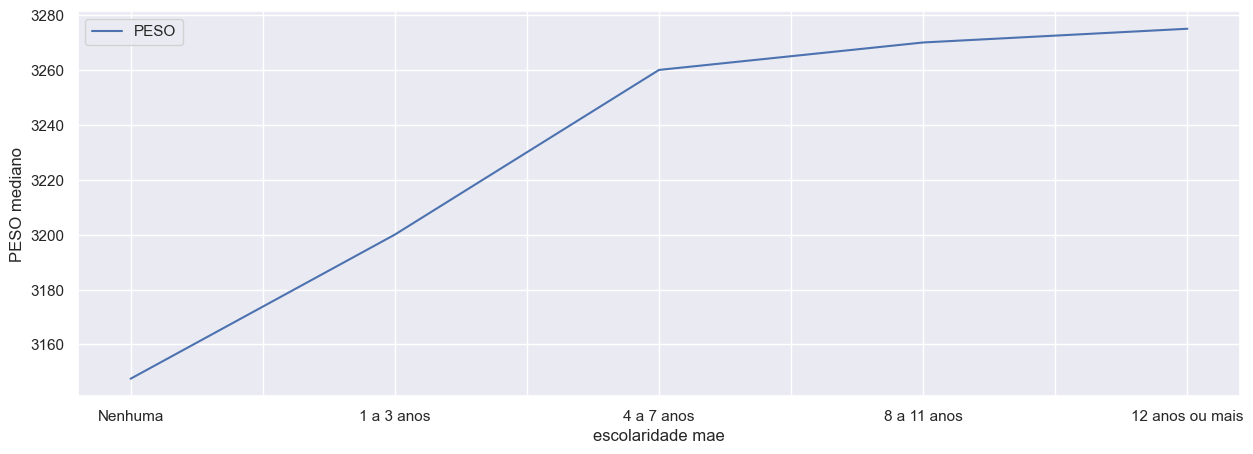

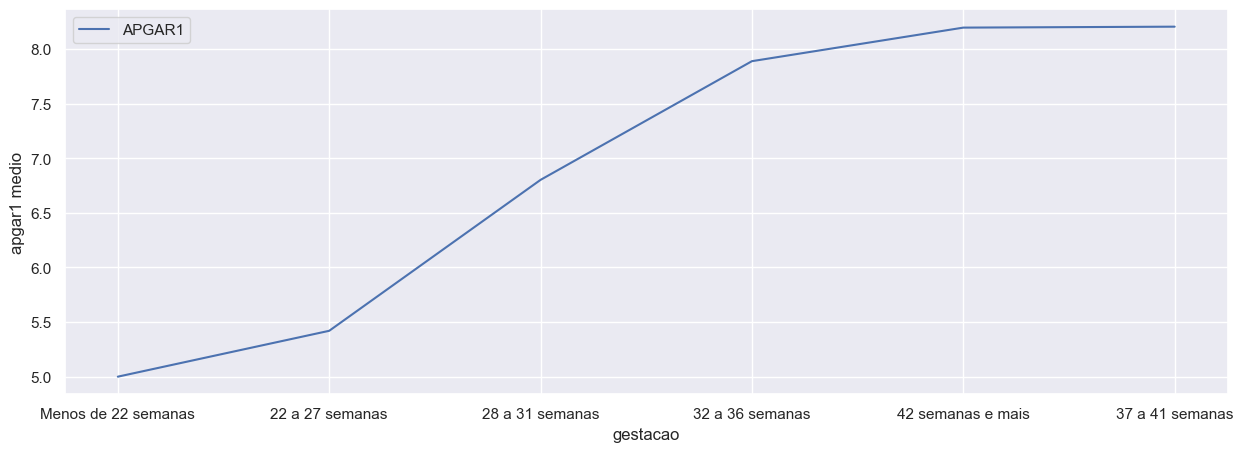

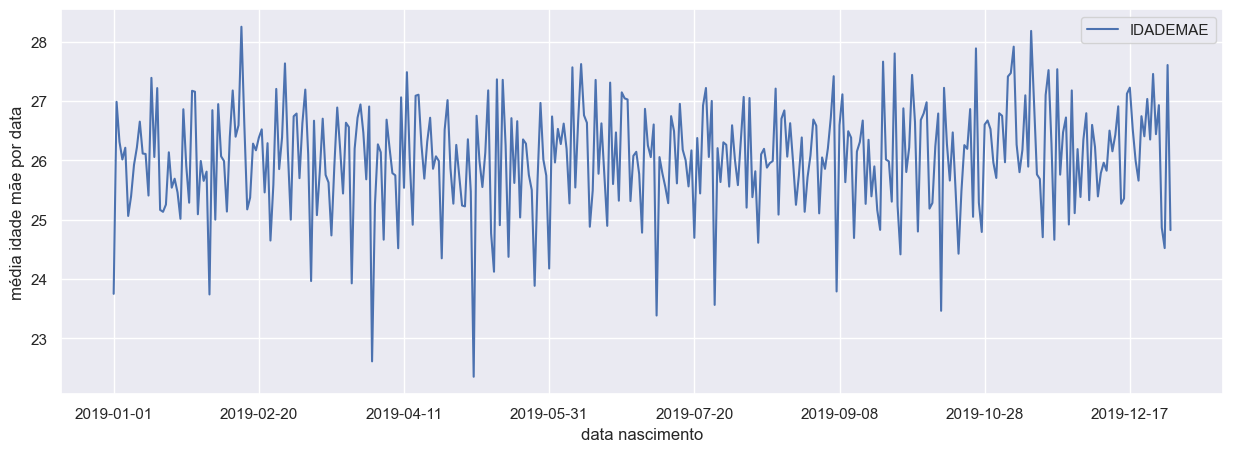

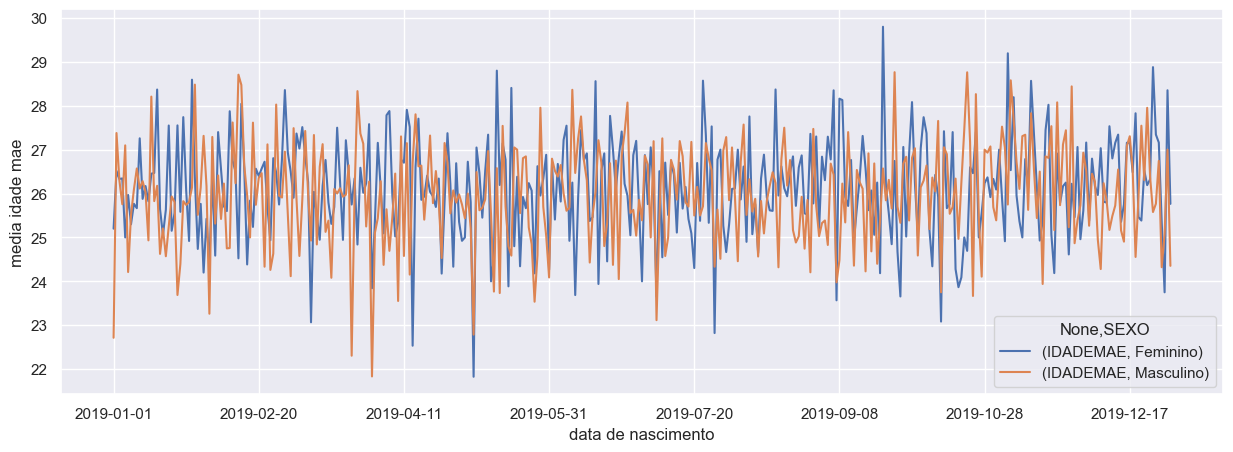

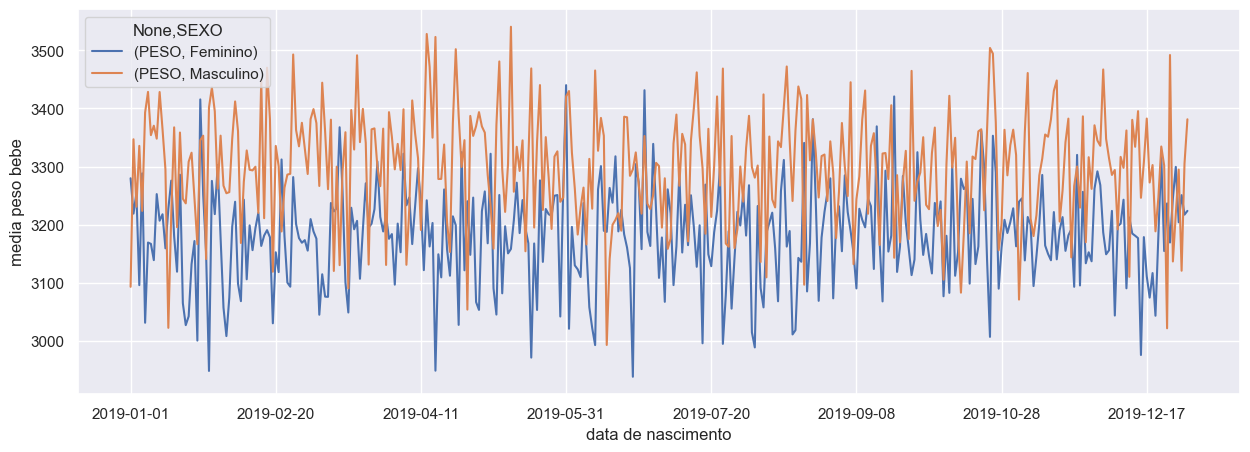

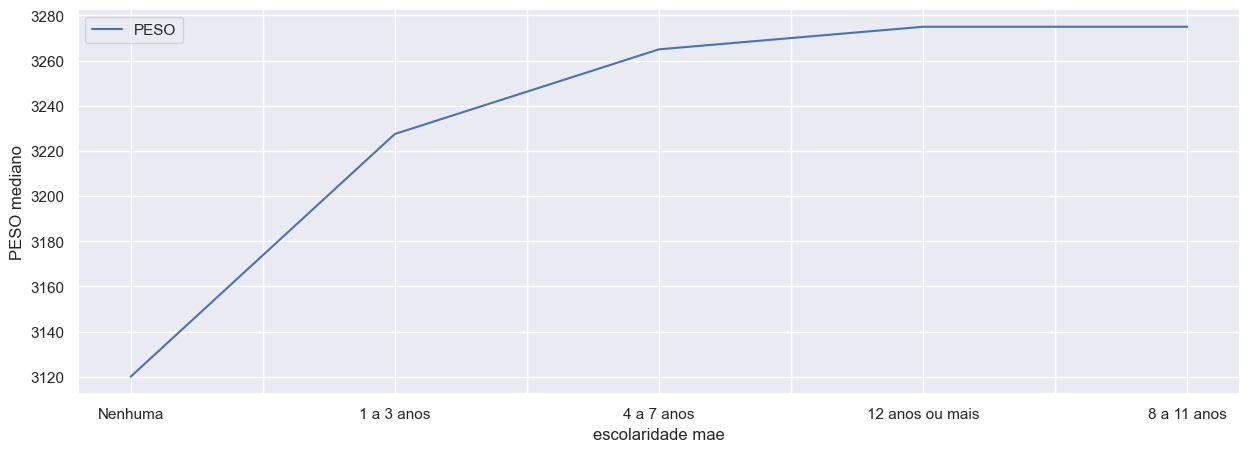

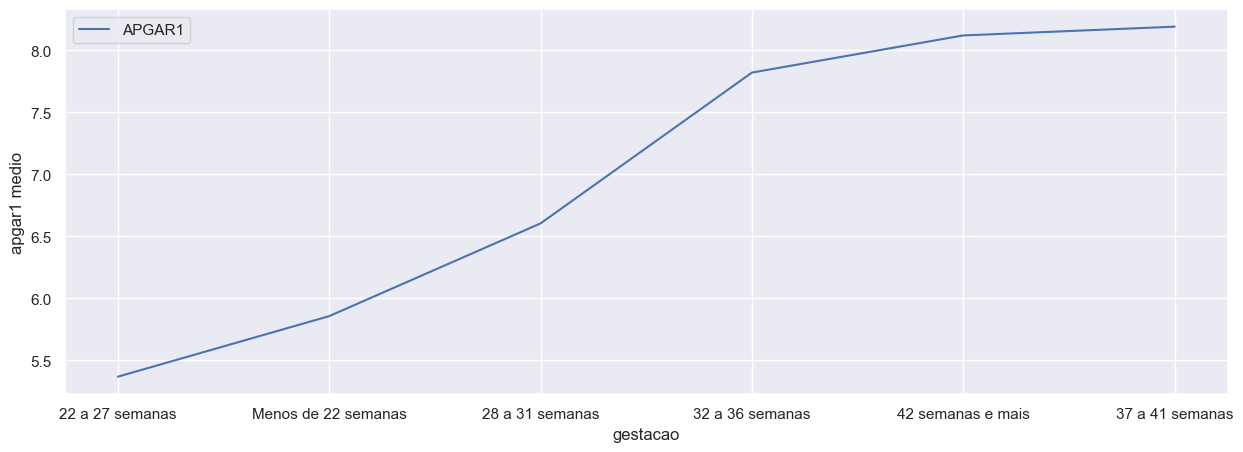

In [3]:
meses = ["MAR","ABR","MAI","JUN","DEZ"]

for mes in meses:
    sinasc = pd.read_csv(f"./input/SINASC_RO_2019_{mes}.csv")

    max_data = sinasc.DTNASC.max()[:7]
    print(max_data)

    os.makedirs('./output/figs/'+max_data, exist_ok=True)

    plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
    plt.savefig('./output/figs/'+max_data+'/media idade mae por data.png')

    plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
    plt.savefig('./output/figs/'+max_data+'/media idade mae por sexo.png')

    plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
    plt.savefig('./output/figs/'+max_data+'/media peso bebe por sexo.png')

    plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'PESO mediano','escolaridade mae','sort')
    plt.savefig('./output/figs/'+max_data+'/PESO mediano por escolaridade mae.png')

    plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
    plt.savefig('./output/figs/'+max_data+'/media apgar1 por gestacao.png')

Neste script gerei um loop dos meses solicitados na tarefa.

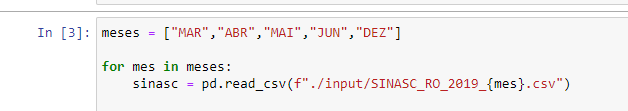

Do mesmo modo que criei um loop para os meses da lista poderiamos utilizando o mesmo racionio criar um novo loop para o ano conforme a seguir:

In [ ]:
def load_data(mes, ano):
    file_name = f"./input/SINASC_RO_{ano}_{mes}.csv"
    df = pd.read_csv(file_name)
    return df

        # Defina os meses e anos desejados.
    meses = ["JAN", "FEV", "MAR", "ABR", "MAI", "JUN", "JUL", "AGO", "SET", "OUT", "NOV", "DEZ"]
    anos = [2019, 2020, 2021]

    # Loop pelos meses e anos desejados.
    for ano in anos:
        for mes in meses:
            # Carrega o arquivo CSV para cada mes e ano.
            df = load_data(mes, ano)

Poderiamos também utilizar a biblioteca datetime para realizar a geração dos arquivos diariamente da web com um stript com execução diaria/programada.